# Importing Libraries and LOading the Data

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score

import tensorflow as tf

import warnings

## Load the Data

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Organize the Data

In [3]:
df.drop('Booking_ID' , axis = 1 , inplace=True) # Useless feature

# Expoloratory Data Analysis(EDA)

## Informations about the Data

In [4]:
df.shape

(36275, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

## Number of Missing Data

In [6]:
df.isna().sum() # Clear

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Describe the Data

In [7]:
df.describe().T # Need to Scale.

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


## Data Visualization - Number of observations

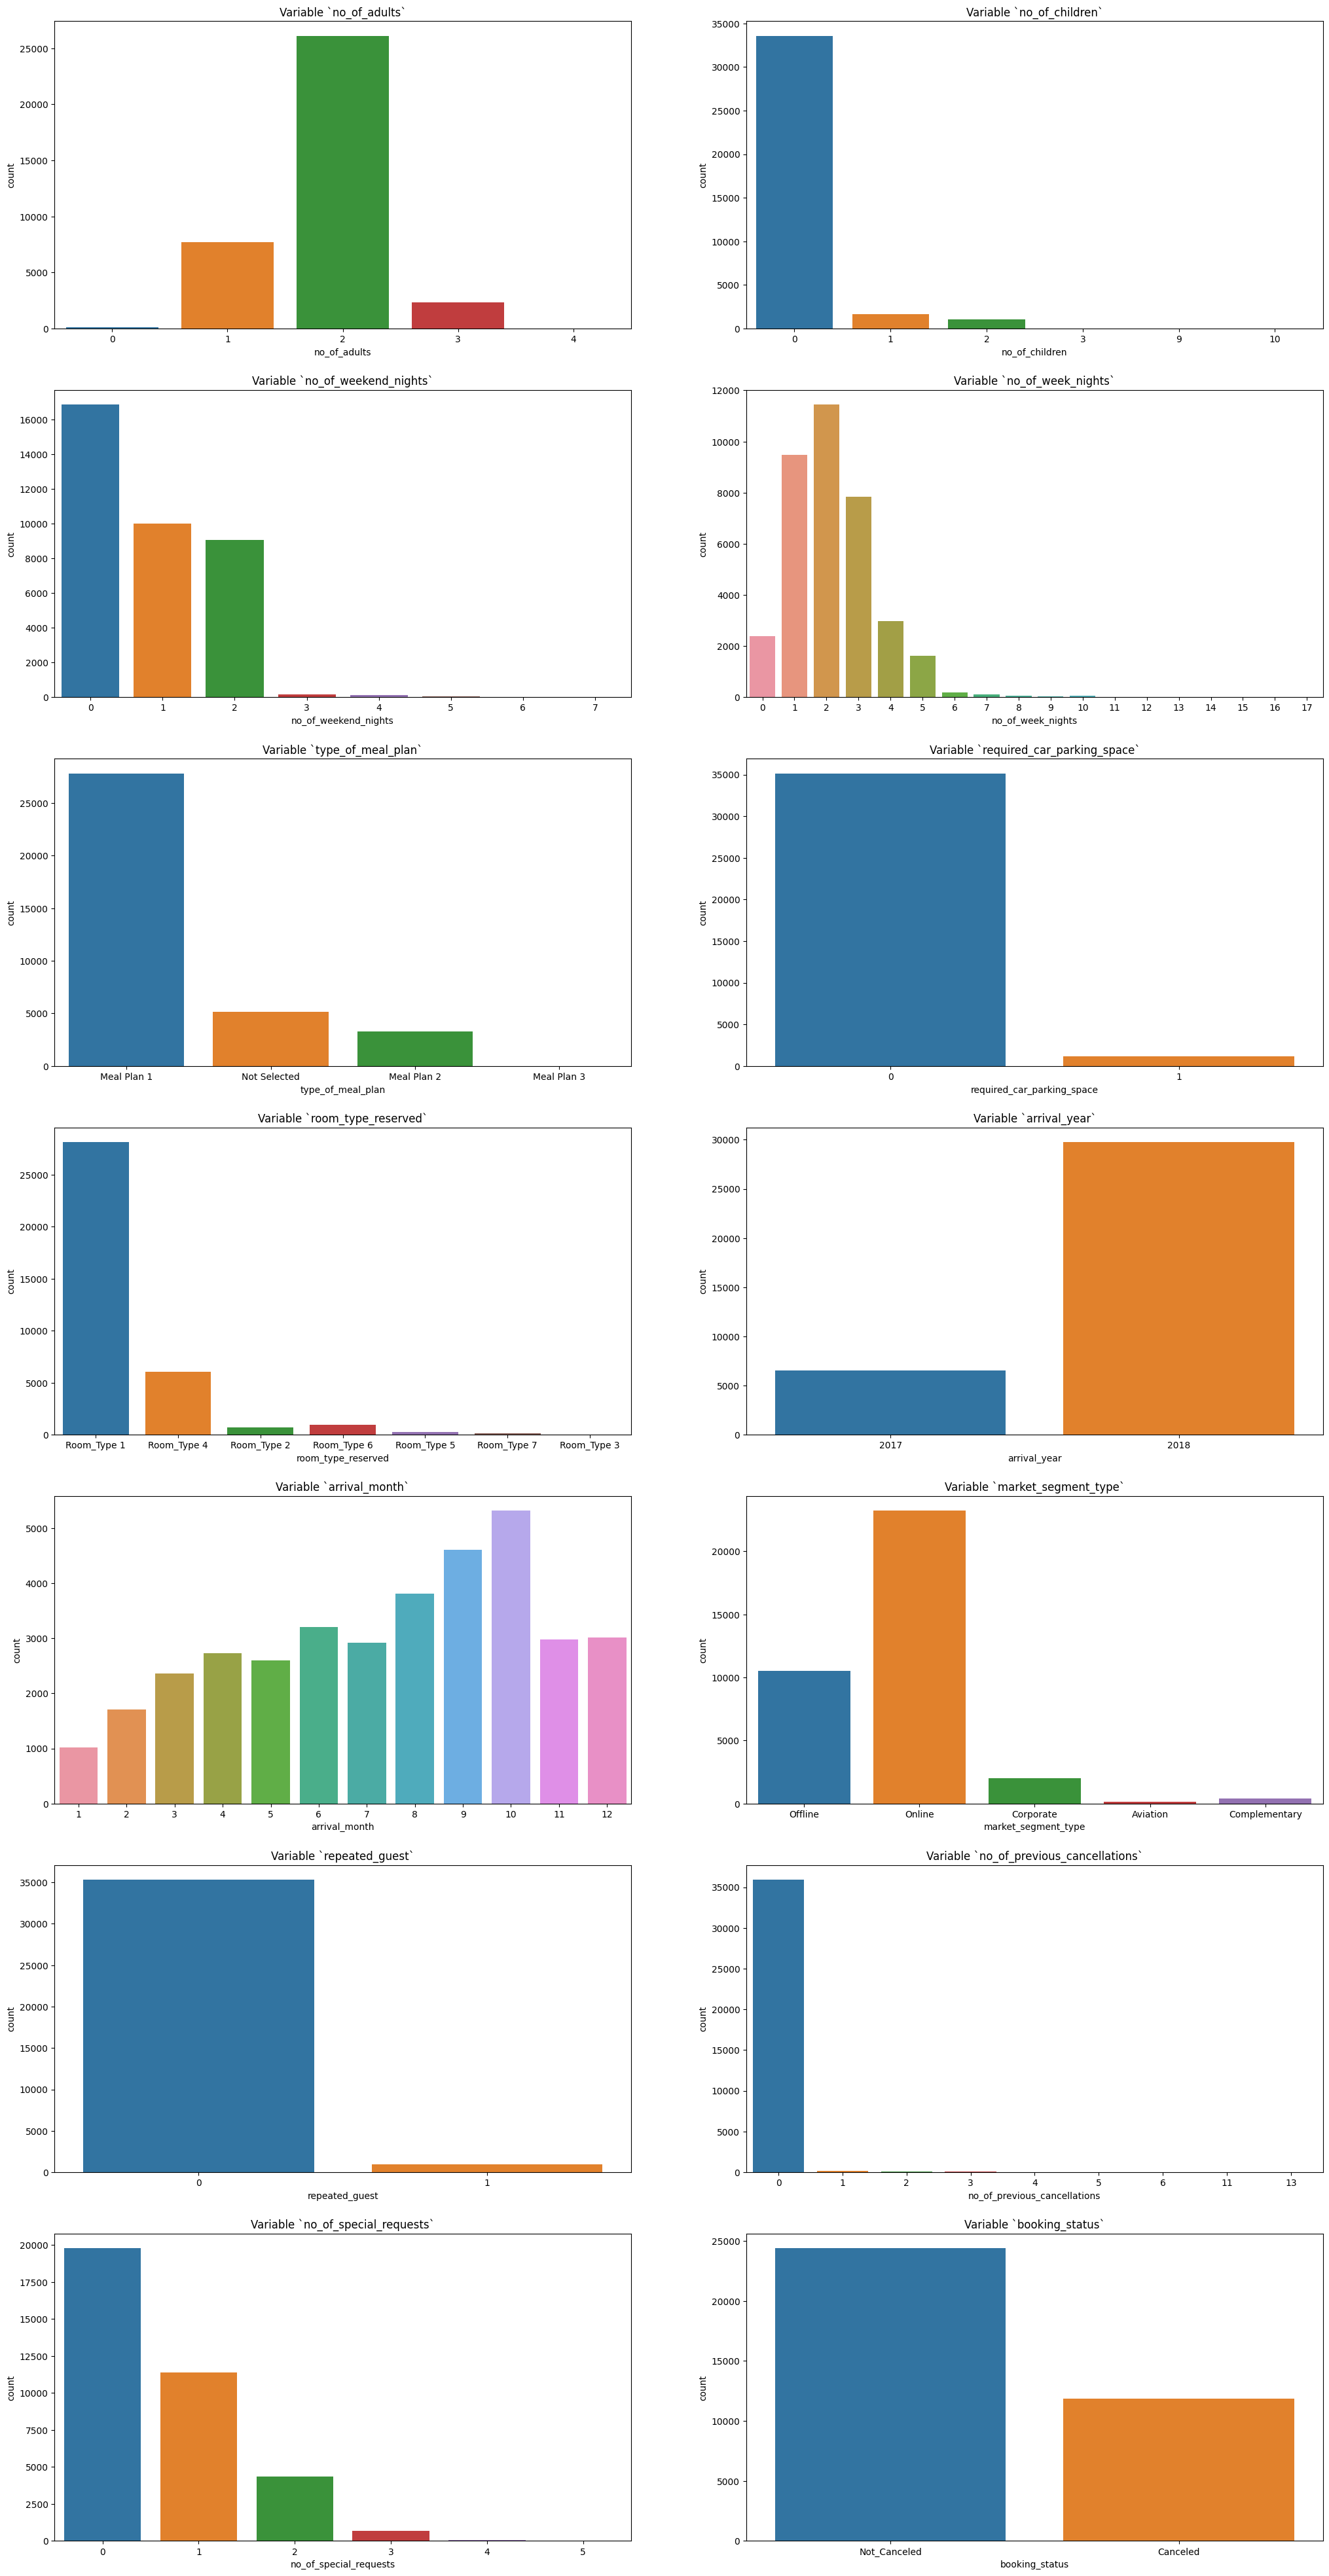

In [8]:
col = 0
row = 0

fig, ax = plt.subplots(7, 2, figsize=(25, 50))

for column in df.drop(
    [
        "lead_time",
        "arrival_date",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
    ],
    axis=1,
).columns:
    sns.countplot(data=df, x=column, ax=ax[row, col]).set(title=f"Variable `{column}`")

    col += 1
    if col > 1:
        row += 1
        col = 0

## Data Visualization - Histogram

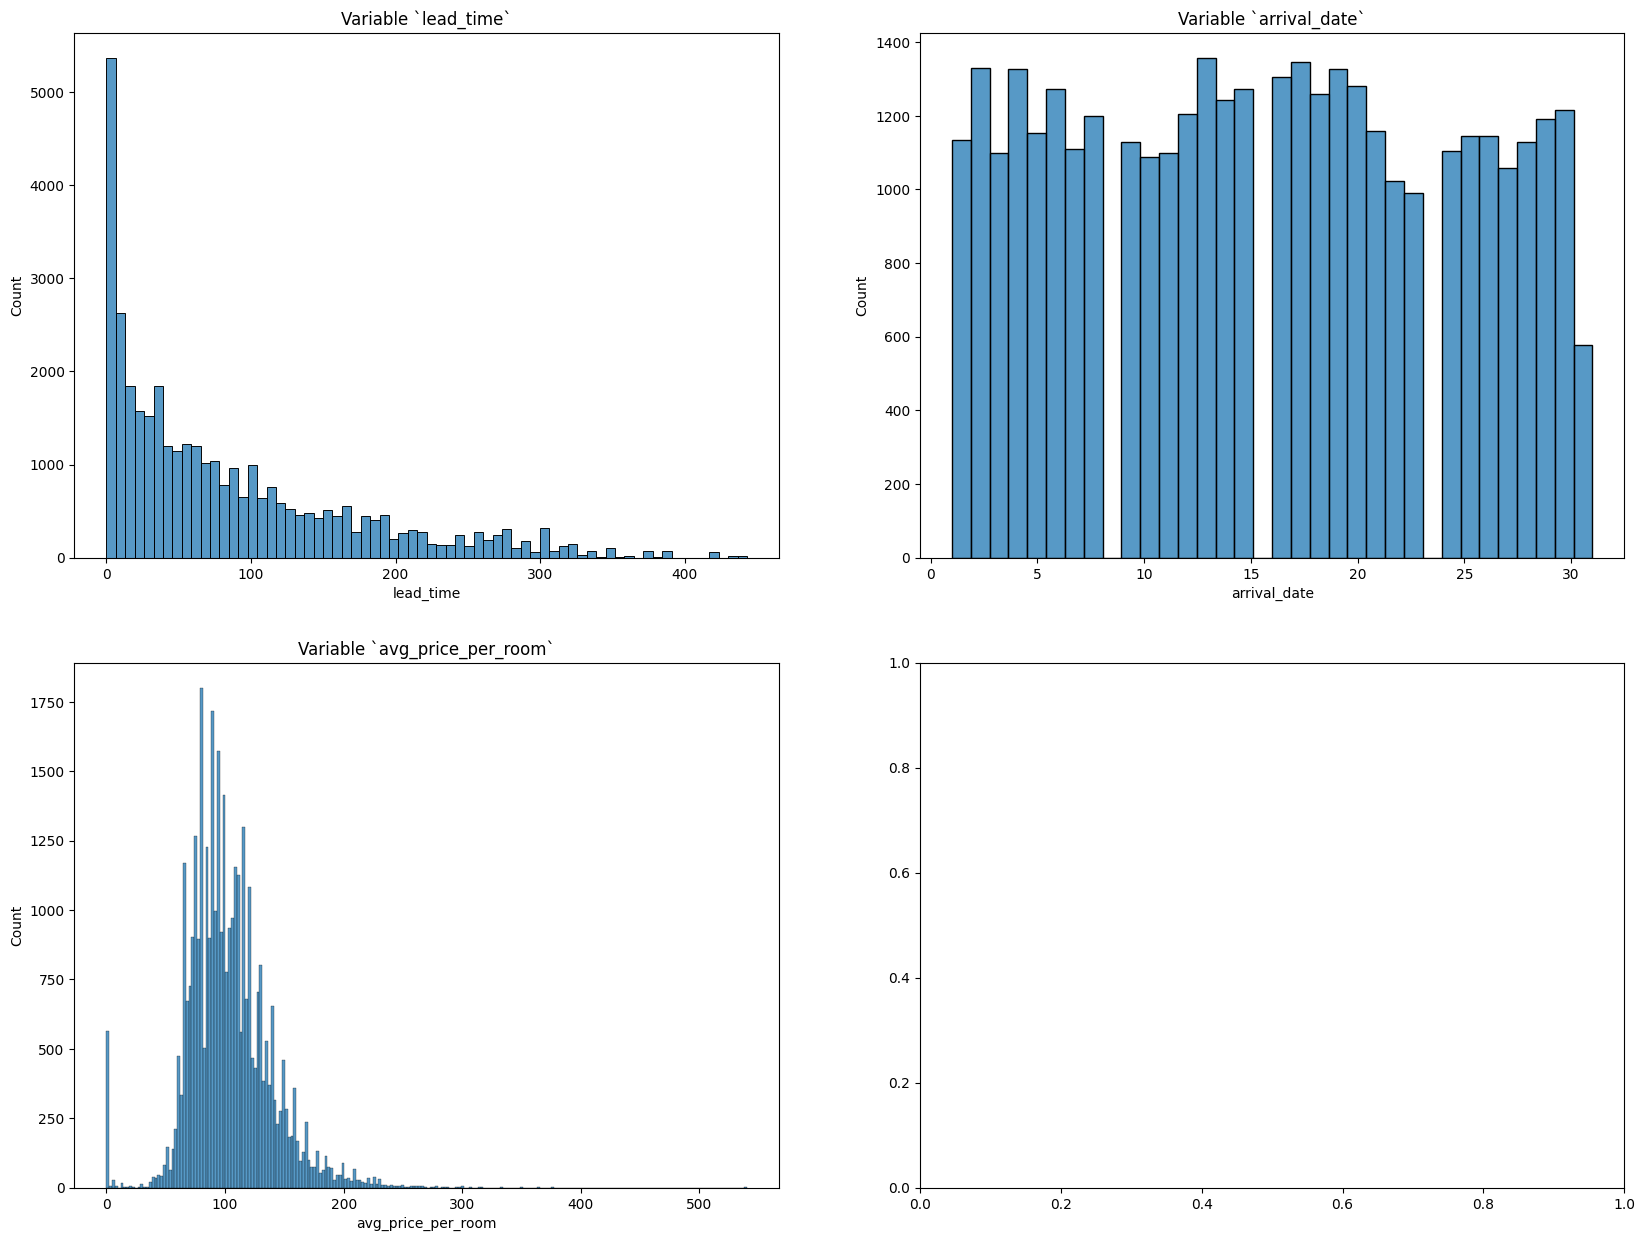

In [9]:
col = 0
row = 0

fig, ax = plt.subplots(2, 2, figsize=(20, 15))

for column in ["lead_time", "arrival_date", "avg_price_per_room"]:
    sns.histplot(data=df, x=column, ax=ax[row, col]).set(title=f"Variable `{column}`")

    col += 1
    if col > 1:
        row += 1
        col = 0

## Data Visualization - Number of observations based on 'booking_status' target variable

Text(0.5, 0.98, 'Variable `booking_status`')

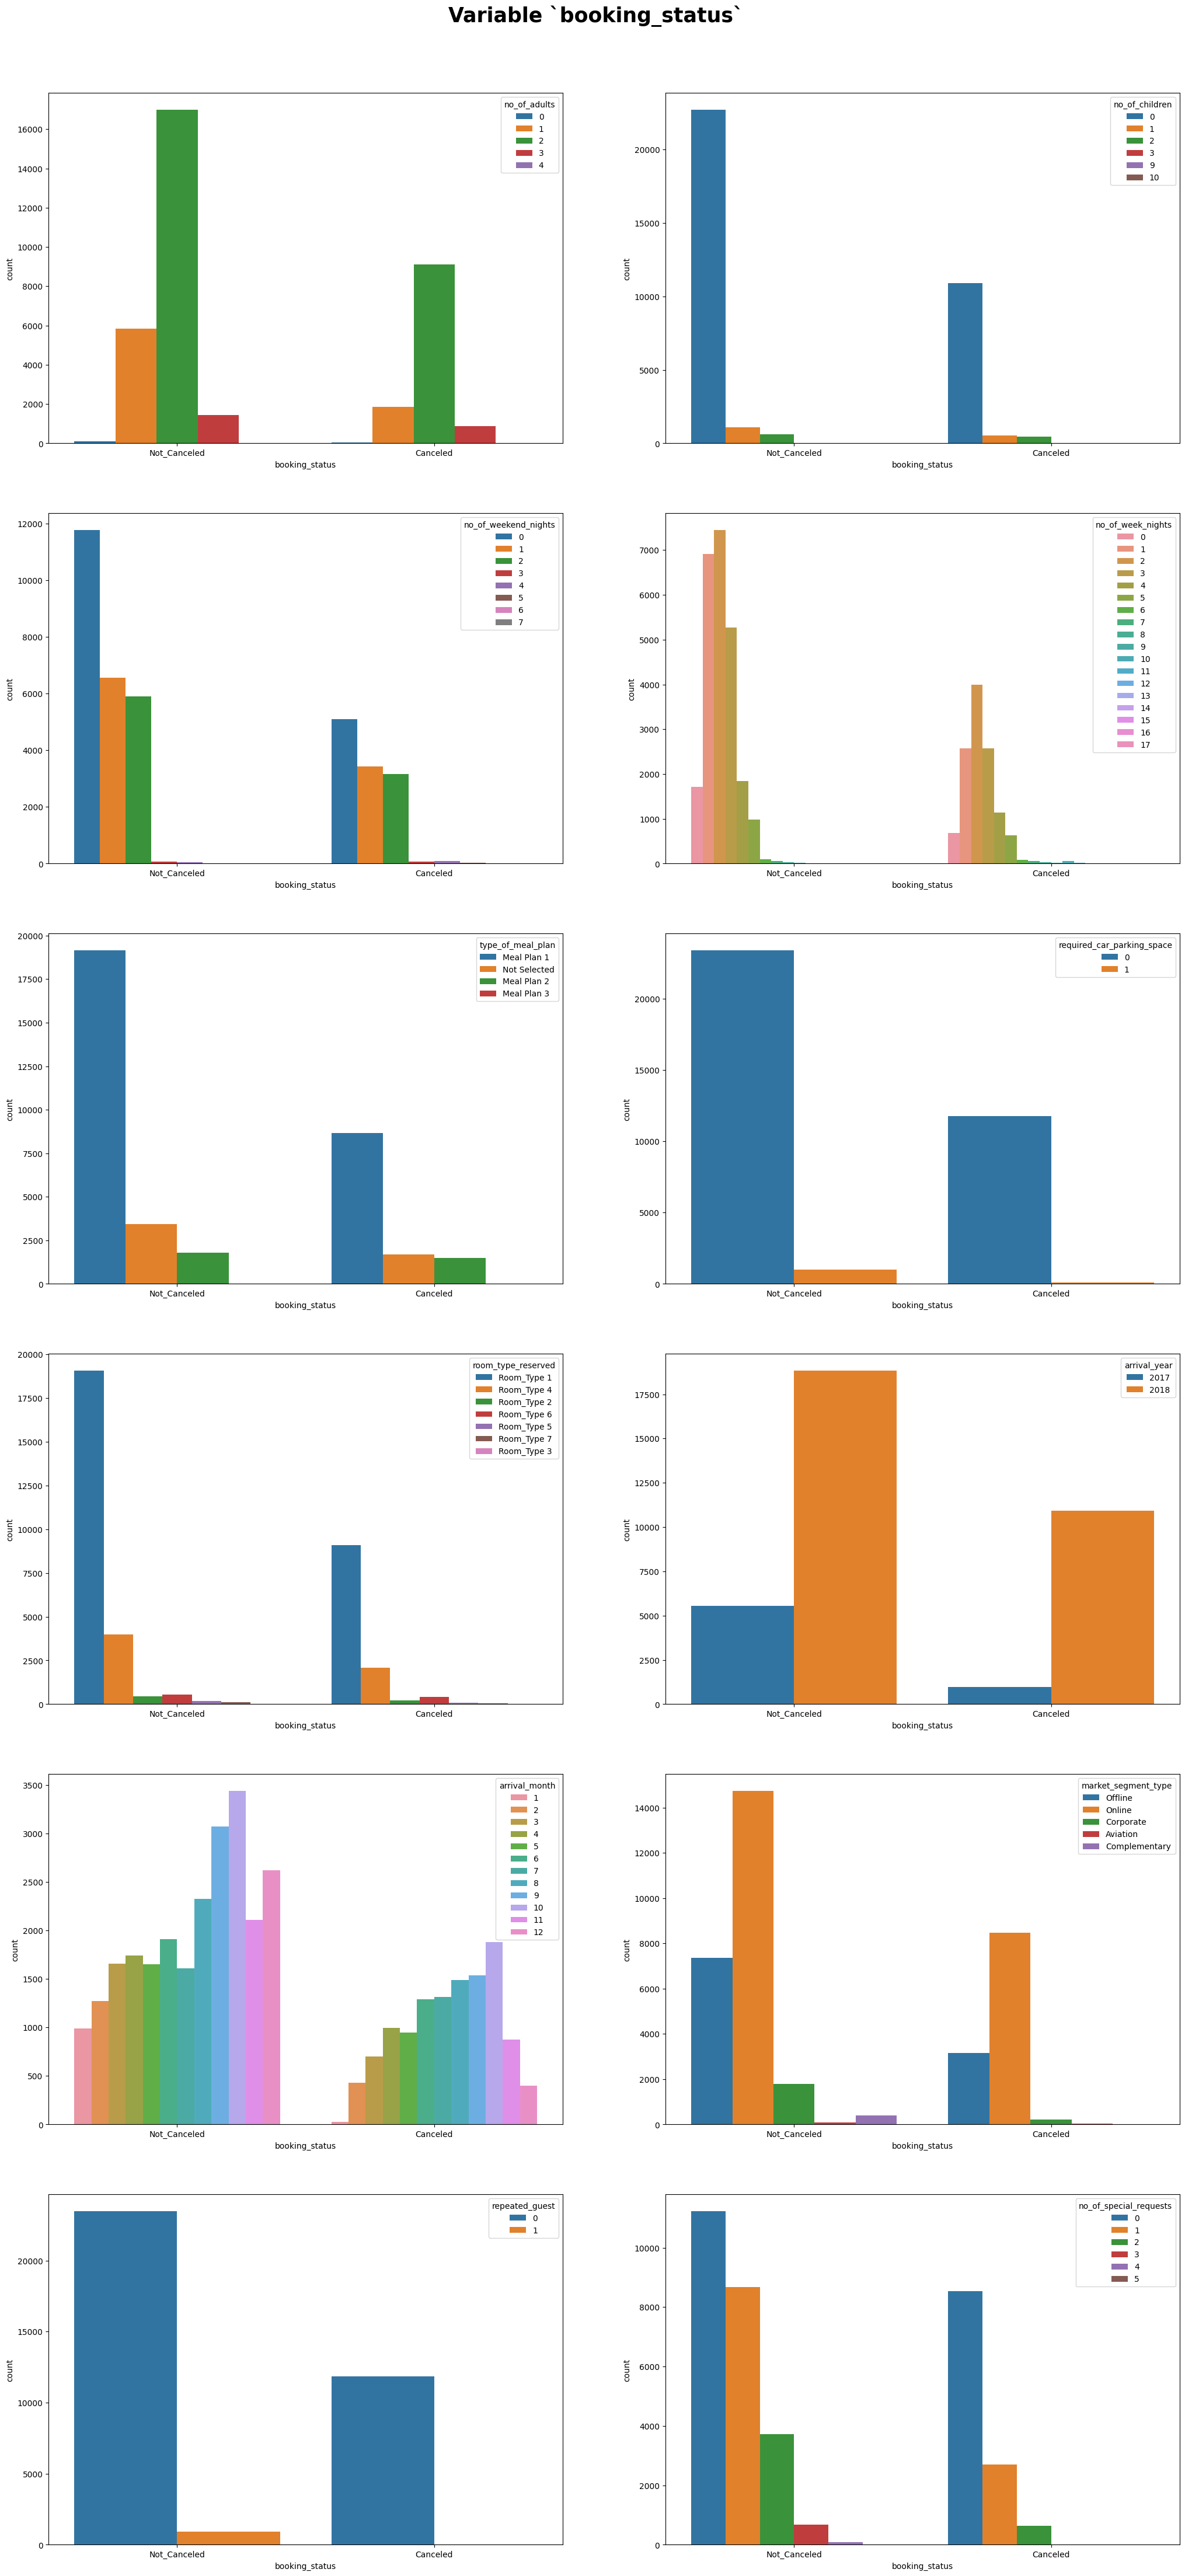

In [10]:
col = 0
row = 0

fig, ax = plt.subplots(6, 2, figsize=(25, 50))

for column in df.drop(
    [
        "lead_time",
        "arrival_date",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
        "booking_status",
        "no_of_previous_cancellations"
    ],
    axis=1
).columns:
    sns.countplot(data=df, x="booking_status", hue=column, ax=ax[row, col])

    col += 1
    if col > 1:
        row += 1
        col = 0

fig.subplots_adjust(top=0.95)
plt.suptitle("Variable `booking_status`", fontweight="bold", fontsize=25)

## Data Visualization - KDE Plot

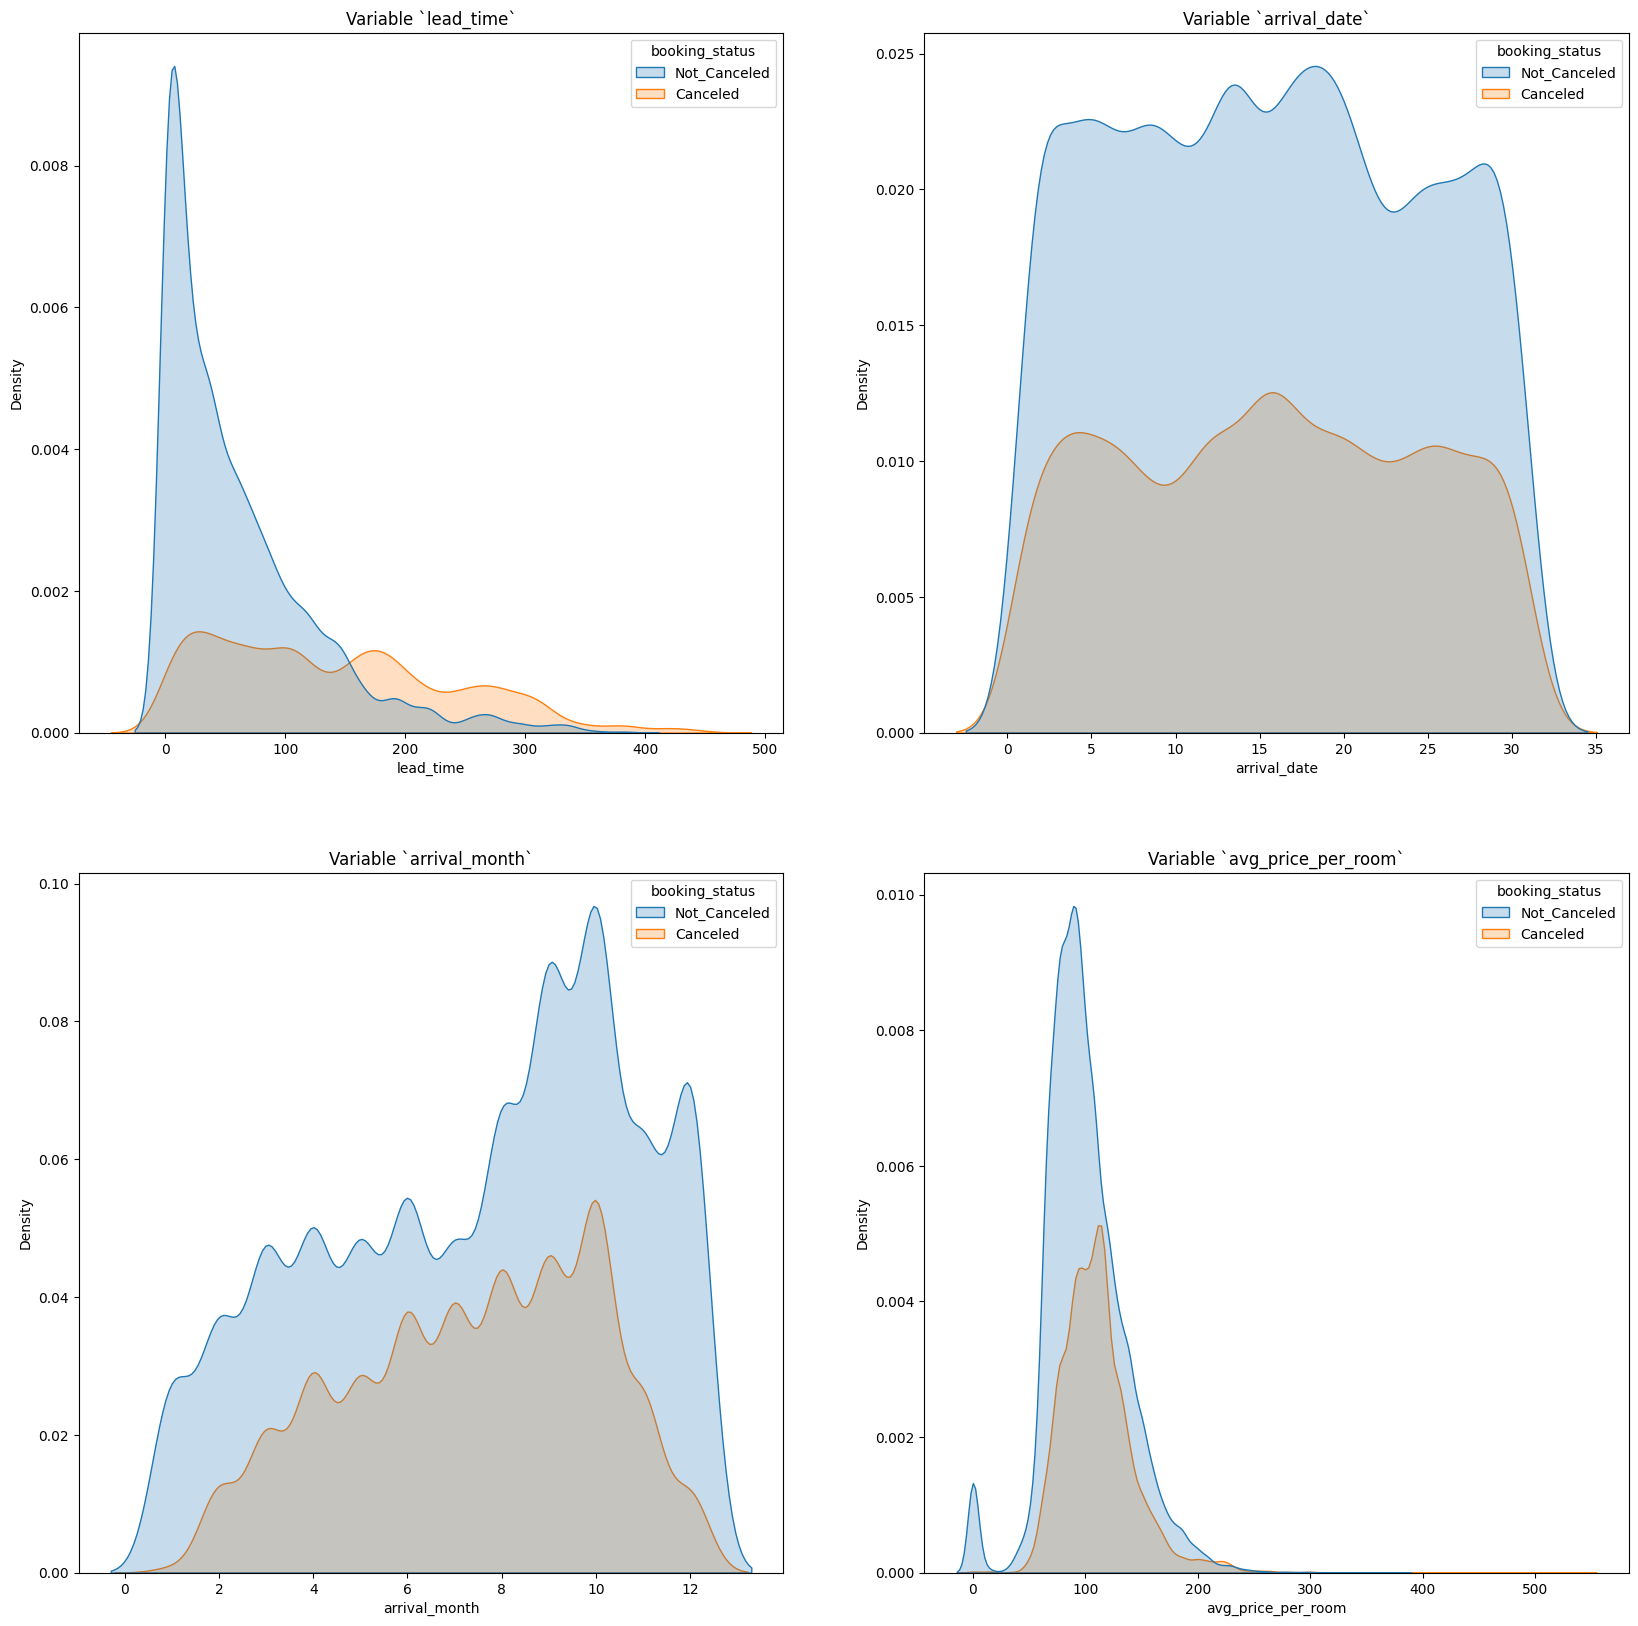

In [11]:
warnings.filterwarnings("ignore")

col = 0
row = 0

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

for column in ["lead_time", "arrival_date", "arrival_month", "avg_price_per_room"]:
    sns.kdeplot(
        data=df, x=column, ax=ax[row, col], hue="booking_status", shade=True
    ).set(title=f"Variable `{column}`")

    col += 1
    if col > 1:
        row += 1
        col = 0

## Data Visualization - KDE plot based on 'lead_time' variable

Text(0.5, 0.98, 'Variable `lead_time`')

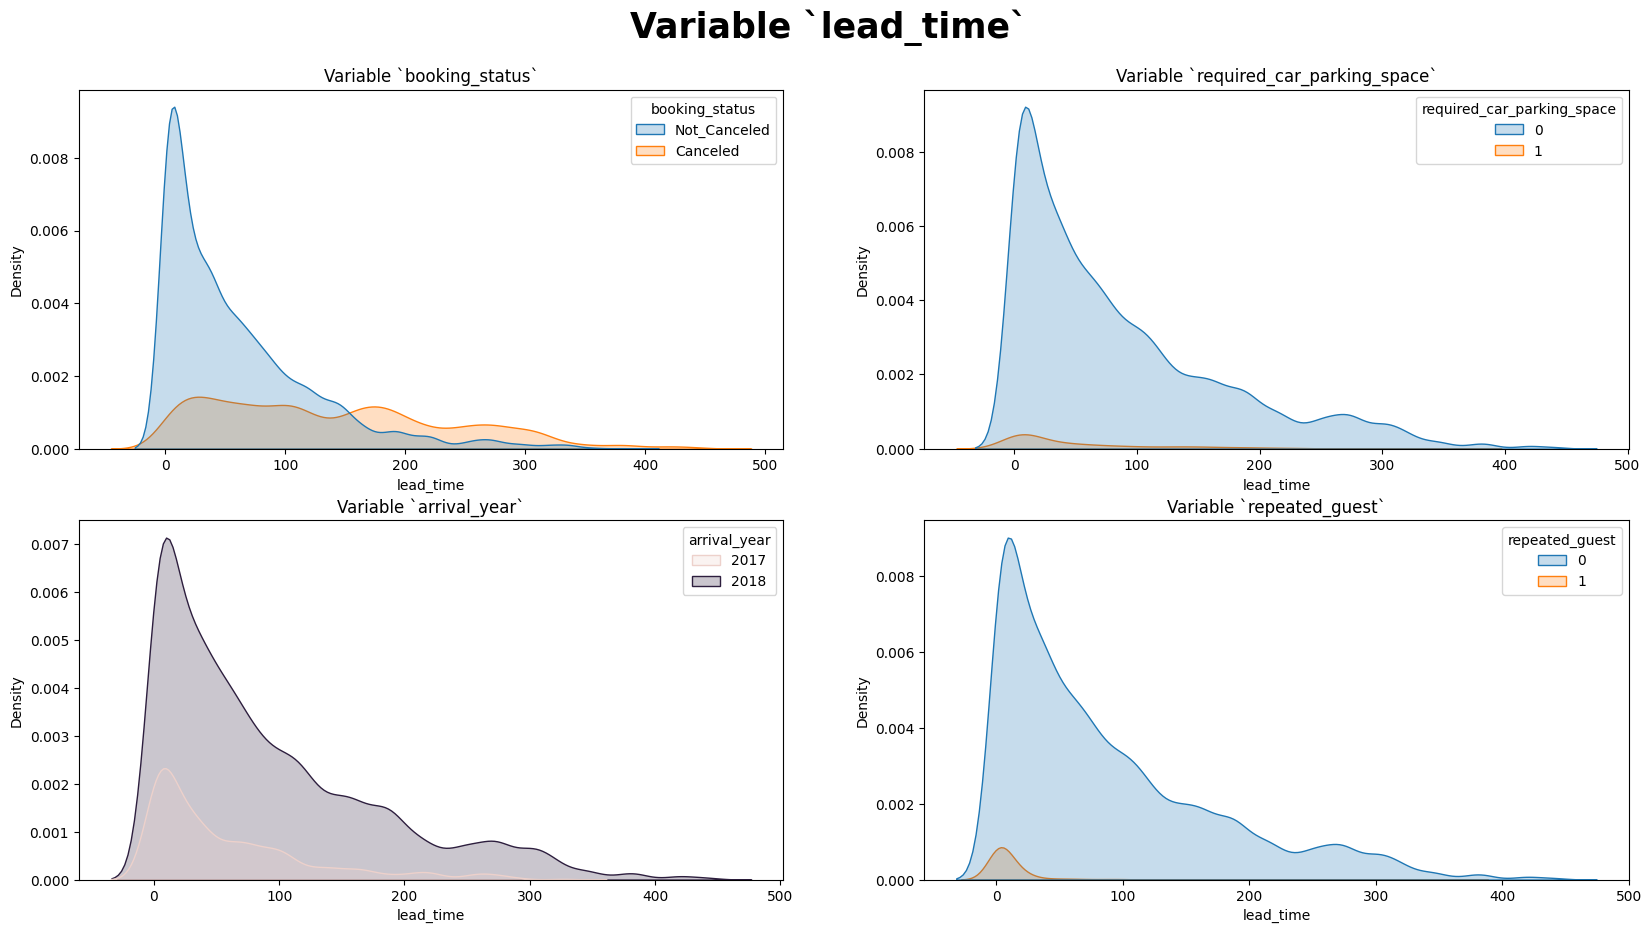

In [12]:
col = 0
row = 0

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for column in [
    "booking_status",
    "required_car_parking_space",
    "arrival_year",
    "repeated_guest",
]:
    sns.kdeplot(data=df, x="lead_time", ax=ax[row, col], hue=column, shade=True).set(
        title=f"Variable `{column}`"
    )

    col += 1
    if col > 1:
        row += 1
        col = 0

fig.subplots_adjust(top=0.90)
plt.suptitle("Variable `lead_time`", fontweight="bold", fontsize=25)

## Feature Correlation Matrix

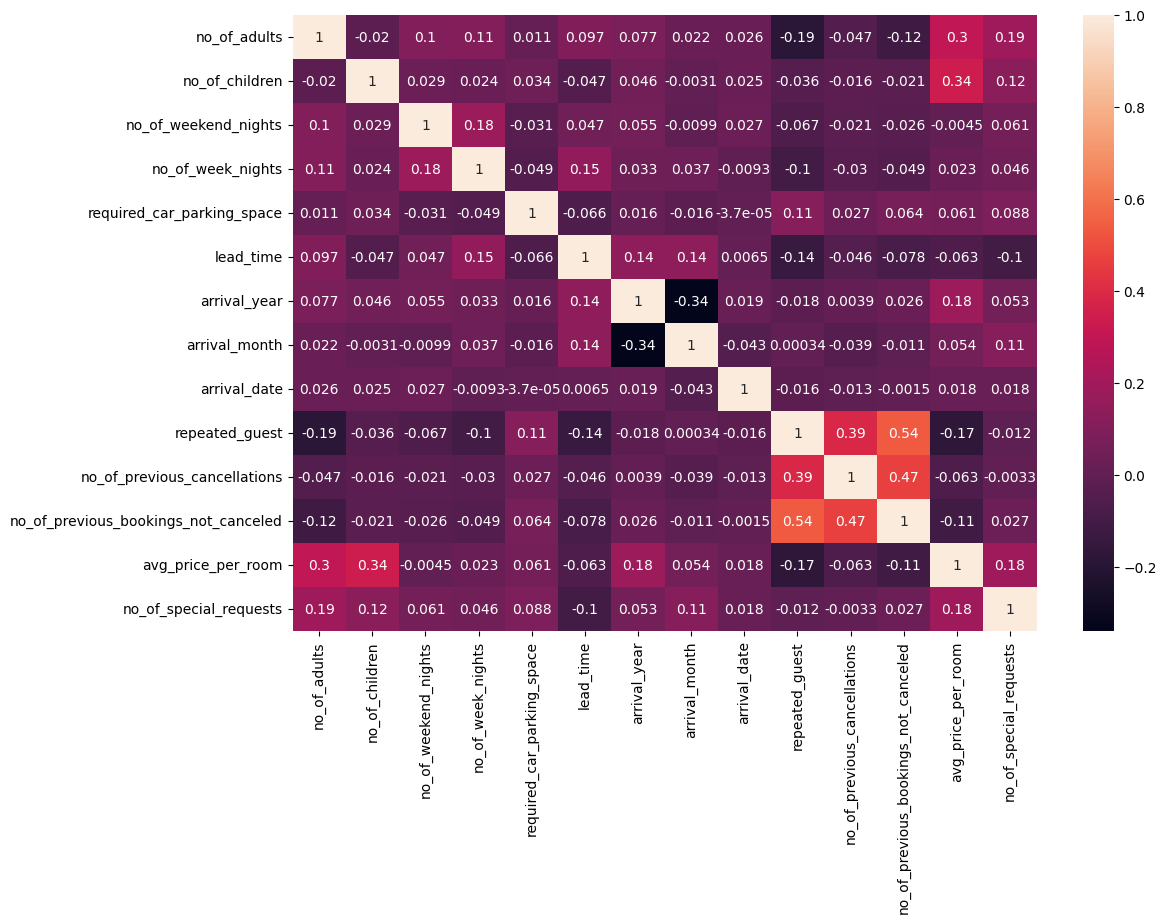

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr() , annot = True);

## Encoding

In [14]:
# Some variables are categorical features. Therefore, we need to encode them into numeric variables

In [15]:
# df = pd.get_dummies(df)

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class MultiOrdinalEncoder(BaseEstimator, TransformerMixin):
    """
    A class to encode multiple categorical columns with an ordinal encoding.
    """
    
    def __init__(self, columns=None):
        self.columns = columns
        self.mapping = {}
    
    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = list(X.select_dtypes(include=['category', 'object']).columns)
        
        for col in self.columns:
            categories = X[col].astype('category').cat.categories.tolist()
            self.mapping[col] = {cat: i for i, cat in enumerate(categories)}
        
        return self
    
    def transform(self, X, y=None):
        X_encoded = X.copy()
        
        for col, mapping in self.mapping.items():
            X_encoded[col] = X_encoded[col].map(mapping).fillna(-1).astype(int)
        
        return X_encoded

In [17]:
df = MultiOrdinalEncoder(
    columns=[
        "type_of_meal_plan",
        "room_type_reserved",
        "market_segment_type",
    ]
).fit_transform(df)

df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,Canceled


In [18]:
df['booking_status'] = LabelEncoder().fit_transform(df['booking_status'])

In [19]:
# # Custom class to encode everything at once
# class MultiColumnLabelEncoder:
#     def __init__(self, columns=None):
#         self.columns = columns

#         # Not needed in this case
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         output = X.copy()
#         if self.columns is not None:
#             for col in self.columns:
#                 output[col] = LabelEncoder().fit_transform(output[col])
#         else:
#             for colname, col in output.iteritems():
#                 output[colname] = LabelEncoder().fit_transform(col)
#         return output

#     def fit_transform(self, X, y=None):
#         return self.fit(X, y).transform(X)

In [20]:
# df = MultiColumnLabelEncoder(
#     columns=[
#         "type_of_meal_plan",
#         "room_type_reserved",
#         "market_segment_type",
#         'booking_status'
#     ]
# ).fit_transform(df)

# df.head(3)

## Data Visualization - Distribution of correlations in relation to 'booking_status'

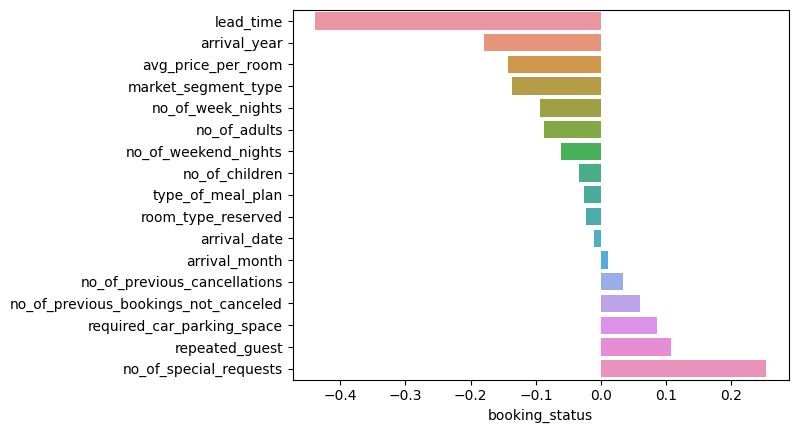

In [21]:
df_corr_bar = df.corr().booking_status.sort_values()[:-1]
sns.barplot(x = df_corr_bar , y = df_corr_bar.index);

# Machine Learning

In [22]:
df.shape

(36275, 18)

In [23]:
X = df.drop('booking_status' , axis =1)
y = df['booking_status']

## Reducing the number of features

I decided to use SelectKBest with f_classif to reduce the number of targets

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA

F_values = f_classif(X,y)[0]
print(F_values)

[2.76133767e+02 3.97312930e+01 1.37995720e+02 3.16434859e+02
 2.58886776e+01 2.71448581e+02 1.91758136e+01 8.63686304e+03
 1.20803714e+03 4.57755936e+00 4.09846480e+00 6.83635048e+02
 4.22379313e+02 4.13098774e+01 1.31842414e+02 7.52582603e+02
 2.48204046e+03]


In [25]:
k = len([num for num in F_values if num > 500])

selector = SelectKBest(f_classif, k=k)
X_fs = selector.fit_transform(X, y)

columns = X.columns[selector.fit(X, y).get_support(indices=True)].tolist()

In [26]:
print('Data with initial features')
pd.DataFrame(X).head(3)

Data with initial features


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0


In [27]:
print('Data with selected features')
pd.DataFrame(X_fs, columns=columns).head(3)

Data with selected features


,lead_time,arrival_year,market_segment_type,avg_price_per_room,no_of_special_requests
0,224.0,2017.0,3.0,65.00,0.0
1,5.0,2018.0,4.0,106.68,1.0
2,1.0,2018.0,4.0,60.00,0.0


## Splitting the Dataset

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.15, random_state=53)

## Data OverSampling

In [29]:
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE, RandomOverSampler

# oversample = RandomOverSampler(random_state=53)
oversample = SMOTE(random_state=53)

In [30]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

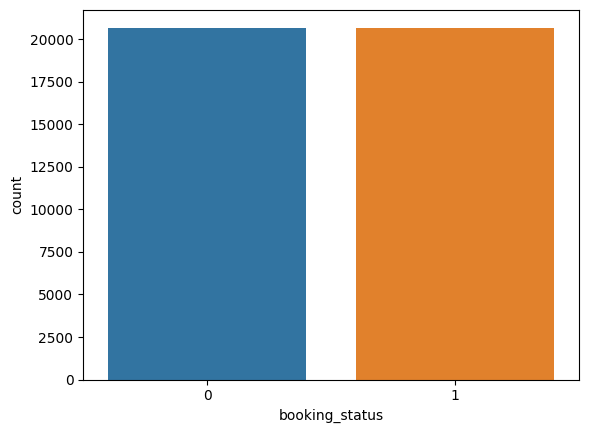

In [31]:
sns.countplot(x = y_train);

## Data Normalization

We need to normalize the data due to different scales

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
models = []
models_comparison = {}

## Finding the best hiperparameters with `RandomizedSearchCV`

I decided to use RandomizedSeachCV because I wanted to learn and see how it works in practice (in comparison with GridSearchCV)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [35]:
with tf.device('/GPU:0'):
    parameters = {
        "max_depth": [4, 5, 6, 7, 9, 10],
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
    }
    tmp_model = DecisionTreeClassifier(random_state=53)
    tmp_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=50, n_jobs=-1, scoring="f1", cv=5
    )
    models.append(tmp_model_random)

    parameters = {
        "max_depth": [4, 5, 6, 7, 9, 10],
        "criterion": ["gini", "entropy", "log_loss"],
    }
    tmp_model = RandomForestClassifier(random_state=53)
    tmp_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=25, n_jobs=-1, scoring="f1", cv=5
    )
    models.append(tmp_model_random)

    parameters = {
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
    }
    tmp_model = KNeighborsClassifier()
    tmp_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=50, n_jobs=-1, scoring="f1", cv=5
    )
    models.append(tmp_model_random)

    parameters = {
        "loss": ["log_loss", "deviance", "exponential"],
        "learning_rate": np.arange(0.1, 0.5, 0.1),
    }
    tmp_model = GradientBoostingClassifier(random_state=53)
    tmp_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=25, n_jobs=-1, scoring="f1", cv=5
    )
    models.append(tmp_model_random)
    
    parameters = {
    'n_estimators': [80, 100, 150, 300, 500, 750],
    'max_depth': [2, 3, 5, 8, 15, None],
    "learning_rate": np.arange(0.1, 1.1, 0.1),
    }
    tmp_model = XGBClassifier(tree_method = 'gpu_hist')
    tmp_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=50, n_jobs=-1, scoring="f1", cv=5
    )
    models.append(tmp_model_random)
    
    parameters = {
    'learning_rate': [0.01, 0.05, 0.1, 0.4, 0.7, 1],
    'n_estimators': [80, 100, 150, 250, 450, 700],
    'max_depth': [2, 3, 5, 8, 10, None],
    "learning_rate": np.arange(0.1, 1.1, 0.1),
    }
    tmp_model = lgb.LGBMClassifier(device = 'gpu')
    tmp_model_random = RandomizedSearchCV(
        tmp_model, parameters, n_iter=50, n_jobs=-1, scoring="f1", cv=5
    )
    models.append(tmp_model_random)

## Model Training

In [36]:
from sklearn.metrics import f1_score, precision_score , recall_score

In [37]:
warnings.filterwarnings("ignore")

i = 0
model_names = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "GradientBoostingClassifier",
    "XGBClassifier", 
    "LightGBM"
]

for model in models:
    print(f"Model: {model_names[i]}\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{model_names[i]}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test),
        precision_score(y_pred, y_test),
        recall_score(y_pred, y_test),
    ]
    i += 1

Model: DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      1735
           1       0.92      0.85      0.88      3707

    accuracy                           0.84      5442
   macro avg       0.82      0.84      0.83      5442
weighted avg       0.85      0.84      0.85      5442

------------------------------ 

Model: RandomForestClassifier

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1735
           1       0.91      0.89      0.90      3707

    accuracy                           0.87      5442
   macro avg       0.85      0.86      0.85      5442
weighted avg       0.87      0.87      0.87      5442

------------------------------ 

Model: KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1735
           1       0.91      0.87      0.89      3707

    accuracy             

## Comparision of Model Metrics

In [38]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,86.75%,90.14%,88.91%,91.40%
LightGBM,86.53%,89.98%,88.75%,91.24%
XGBClassifier,86.26%,89.81%,88.94%,90.70%
KNeighborsClassifier,85.54%,89.13%,87.05%,91.31%
GradientBoostingClassifier,85.39%,88.98%,86.62%,91.48%
DecisionTreeClassifier,84.23%,87.98%,84.70%,91.52%


In [ ]:
# Done